
stroke_prediction dataset:


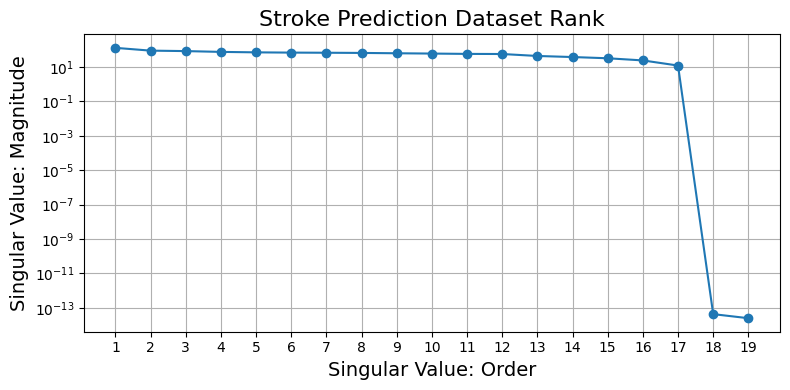

The rank of the dataset is: 17

fetal_health dataset:


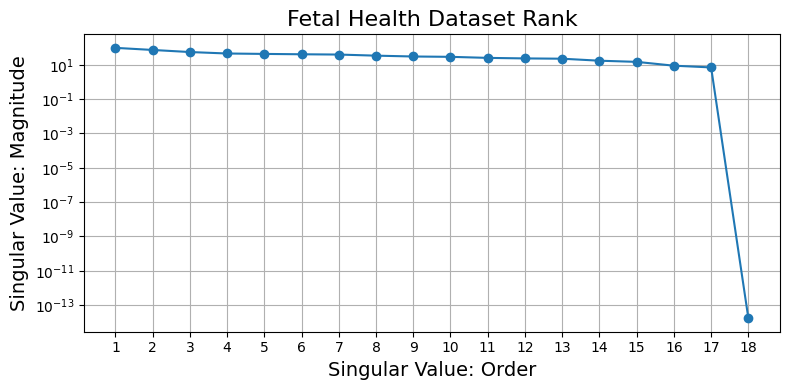

The rank of the dataset is: 17

stroke_prediction_continuous dataset:


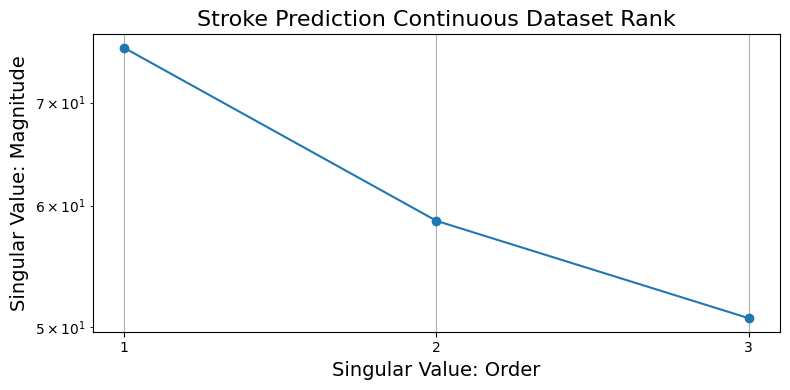

The rank of the dataset is: 3


In [1]:
import sys
import numpy as np
import pandas as pd
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
from scipy.linalg import svd

sys.path.append("../")
from utils import load_data, StrokeParams, FetalHealthParams

if __name__ == "__main__":
    # load data
    strokeX, strokeY = load_data(StrokeParams.data_train, StrokeParams.target_column)
    strokeX_continuous = strokeX.drop(columns=StrokeParams.cat_cols)
    fetalX, fetalY = load_data(
        FetalHealthParams.data_train, FetalHealthParams.target_column
    )
    fetalX.drop(columns=FetalHealthParams.cat_cols, inplace=True)
    for df, name in zip(
        [strokeX, fetalX, strokeX_continuous],
        ["stroke_prediction", "fetal_health", "stroke_prediction_continuous"],
    ):
        print(f"\n{name} dataset:")

        # Compute the matrix rank using SVD which is more numerically stable
        U, s, Vt = svd(df.values)
        rank = np.sum(s > 1e-10)

        # Plot the singular values
        plt.figure(figsize=(8, 4))
        plt.plot(s, marker="o")
        plt.title(f'{name.replace("_", " ").title()} Dataset Rank', fontsize=16)
        plt.xlabel("Singular Value: Order", fontsize=14)
        plt.ylabel("Singular Value: Magnitude", fontsize=14)
        plt.xticks(np.arange(len(s)), np.arange(1, len(s) + 1))
        plt.yscale("log")  # Log scale for better visibility of smaller singular values
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{name}_rank.png")
        plt.show()

        print(f"The rank of the dataset is: {rank}")